___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Support Vector Machines
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/content/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<Axes: xlabel='quality', ylabel='count'>

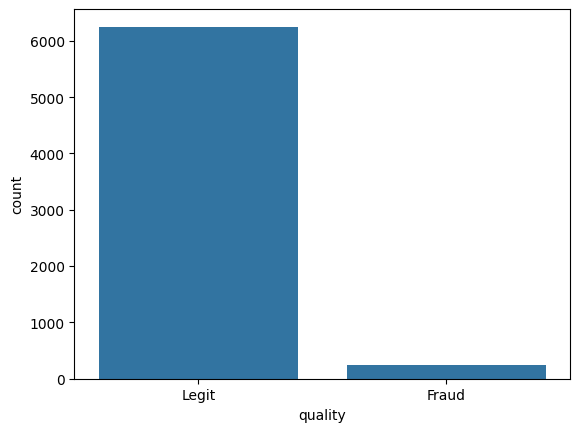

In [6]:
# CODE HERE
sns.countplot(x=df['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

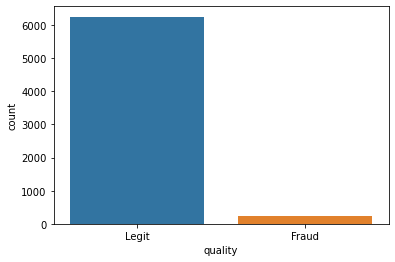

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

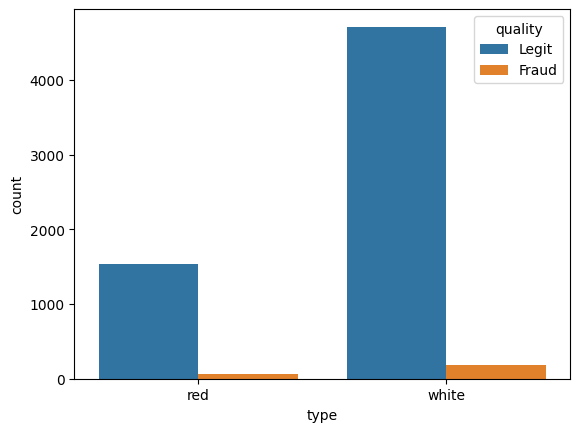

In [7]:
# CODE HERE
sns.countplot(x=df['type'],hue=df['quality'])

<AxesSubplot:xlabel='type', ylabel='count'>

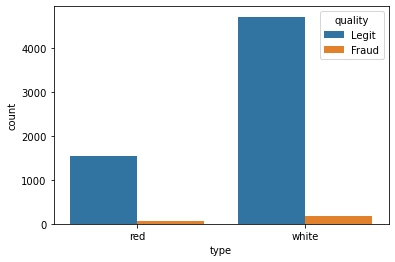

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [40]:
red_percentage = df[df['type']=='red']['quality'].value_counts()[1]/df[df['type']=='red']['quality'].value_counts().sum()
white_percentage = df[df['type']=='white']['quality'].value_counts()[1]/df[df['type']=='white']['quality'].value_counts().sum()

<ipython-input-40-b61f31c2cac7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  red_percentage = df[df['type']=='red']['quality'].value_counts()[1]/df[df['type']=='red']['quality'].value_counts().sum()
<ipython-input-40-b61f31c2cac7>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  white_percentage = df[df['type']=='white']['quality'].value_counts()[1]/df[df['type']=='white']['quality'].value_counts().sum()


In [44]:
print(red_percentage*100)

3.9399624765478425


In [43]:
print(white_percentage*100)

3.7362188648427925


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [52]:
# CODE HERE
df['quality_new'] = df['quality'].map({'Fraud':1,'Legit':0})


In [64]:
#df.drop('type',axis=1,inplace=True)
df.corr()['quality_new']

,quality_new
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality_new')])

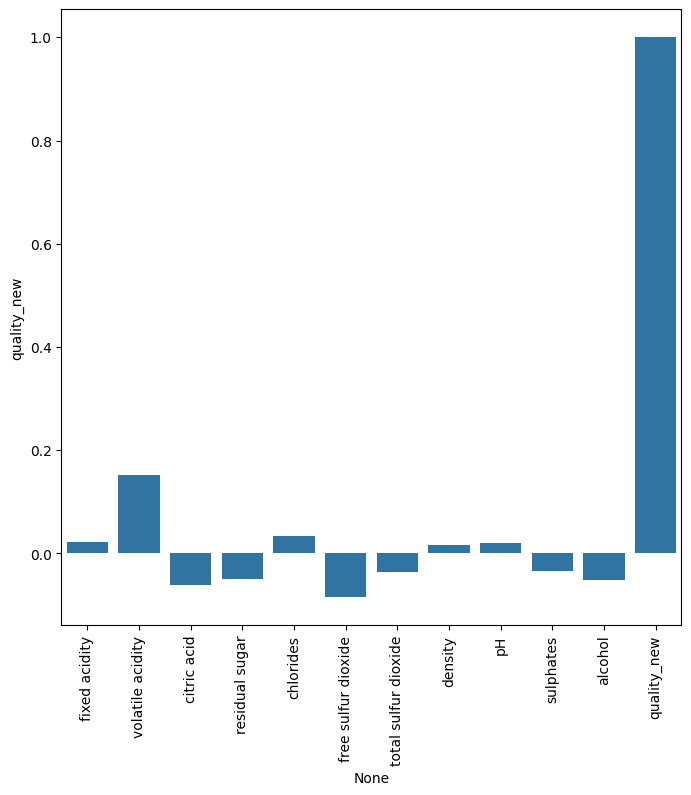

In [67]:
# CODE HERE
plt.figure(figsize=(8,8))
sns.barplot(x=df.corr()['quality_new'].index,y=df.corr()['quality_new'])
plt.xticks(rotation=90)

<AxesSubplot:>

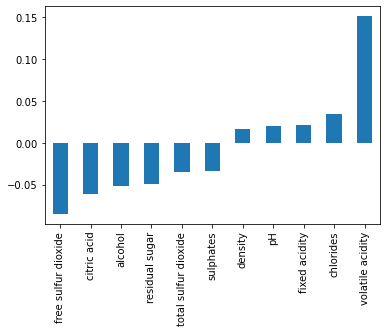

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

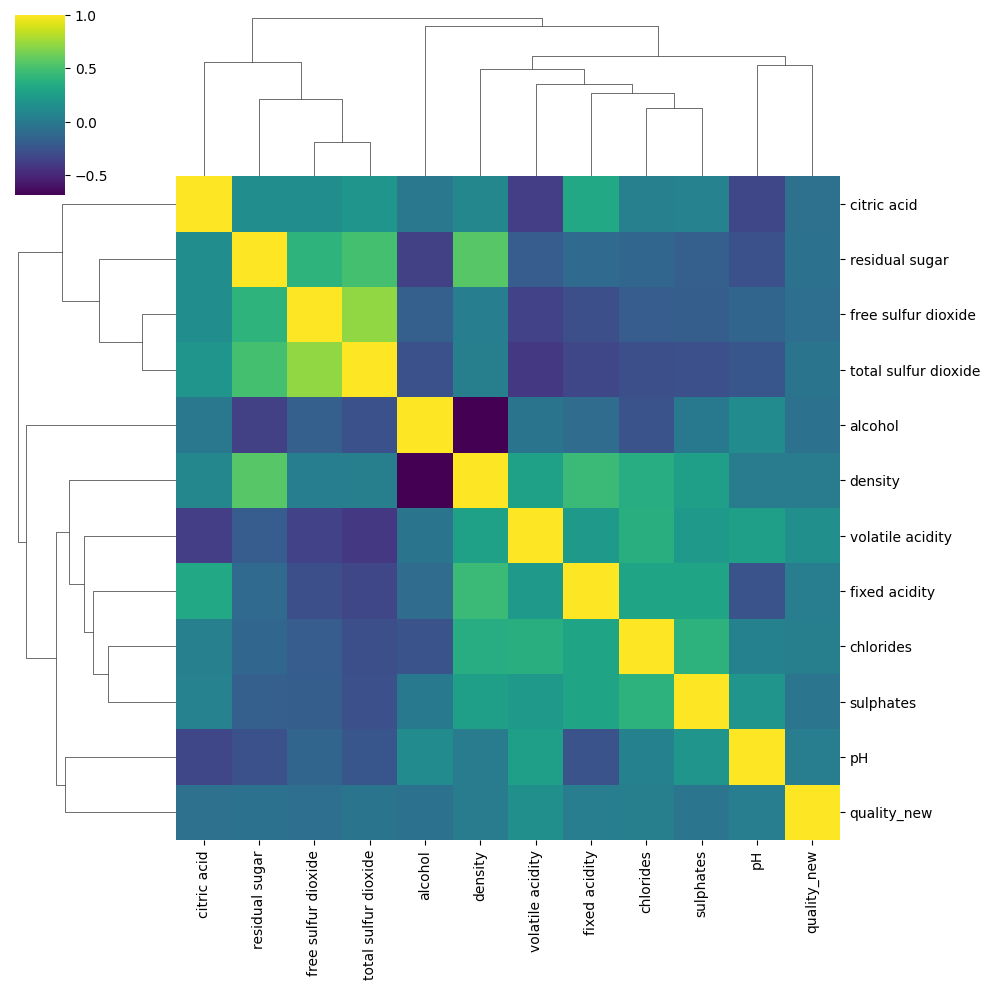

In [71]:
# CODE HERE
sns.clustermap(df.corr(),cmap='viridis')

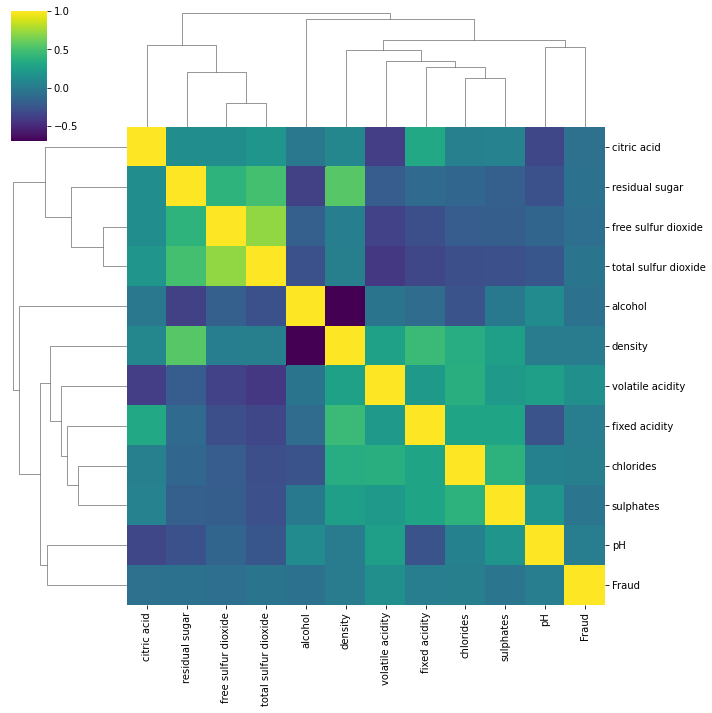

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [73]:
# CODE HERE
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**TASK: Separate out the data into X features and y target label ("quality" column)**

In [74]:
X = df.drop(['quality_new'],axis=1)
y = df['quality_new']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the X train and X test data.**

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
X_train

array([[ 1.07925583,  2.11467205, -1.50654017, ...,  0.55963847,
         0.79094629, -0.79108083],
       [-0.31042998,  0.06596159,  1.46711941, ..., -0.92837614,
        -0.88029647, -0.91642732],
       [ 0.23000339,  1.1056057 ,  0.56810605, ...,  0.24963542,
         0.72409658,  1.08911644],
       ...,
       [ 0.84764153,  3.1237384 , -1.22992067, ...,  0.86964151,
         0.05559948, -0.33147705],
       [-0.69645381,  1.59484999, -1.50654017, ...,  2.04765307,
        -0.14494965,  1.3398094 ],
       [-0.07881568, -0.97368253,  1.19049991, ..., -1.05237735,
        -0.01125023,  0.67129482]])

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [82]:
# CODE HERE
from sklearn.svm import SVC
model = SVC(class_weight='balanced')

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [97]:
# CODE HERE
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':['scale','auto']}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.962 total time=   0.2s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.962 total time=   0.2s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.963 total time=   0.2s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.962 total time=   0.2s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.962 total time=   0.2s
[CV 1/5] END .................C=0.1, gamma=auto;, score=0.962 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=auto;, score=0.962 total time=   0.3s
[CV 3/5] END .................C=0.1, gamma=auto;, score=0.963 total time=   0.4s
[CV 4/5] END .................C=0.1, gamma=auto;, score=0.962 total time=   0.4s
[CV 5/5] END .................C=0.1, gamma=auto;, score=0.962 total time=   0.4s
[CV 1/5] END ..................C=1, gamma=scale;, score=0.962 total time=   0.4s
[CV 2/5] END ..................C=1, gamma=scale;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto']},
             verbose=3)

In [99]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale'}

In [90]:
grid.best_score_

np.float64(0.9625449467365634)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

{'C': 1, 'gamma': 'auto'}

**TASK: Display the confusion matrix and classification report for your model.**

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
y_pred = grid.predict(X_test)

In [96]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[623   0]
 [ 27   0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.00      0.00      0.00        27

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[ 17,  10],
       [ 92, 531]], dtype=int64)

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

In [ ]:
# ANSWER: View the solutions video for full discussion on this.